<a href="https://colab.research.google.com/github/mrudan2020/mvp2-deeplearning/blob/main/MVP2_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemática

Para agricultura a entomologia (ciencia que estuda os insetos) é extremamente importante. Este grupo de animais possui íntima relação com a produtividade agrícola, devido a atuação de insetos com impactos positivos e negativos.

Dentre insetos que atuam de maneira positiva destacam-se as abelhas, insetos polinizadores que saõ importantes para fecundação das flores, consequentemente surgimento dos frutos.

Além de insetos benéficos, também podemos encontrar nas propriedades agrícolas insetos que geram dano direto (injúrias) à morfologia das plantas, um importante exemplar deste grupo são os percevejos.

Além dos percevejos, há também as moscas das frutas e dos estábulos que podem gerar danos agrícolas a animais e plantas

O controle químico, atualmente, é o método mais utilizado para combater os insetos danosos, entretanto, quando aplicados de maneira equivocada geram prejuízos ao ambiente e grupos de insetos benéficos, como as abelhas

Como rotina de auditoria, o procedimento amostra de fotografia das entrelinhas de plantio pode ser uma prática importante para avaliar a eficácia da aplicação de inseticidas. De modo que, o uso adequado destes produtos não trará malefícios a insetos não alvos.

A etapa de avaliação manual das amostragens, que consiste em classificar quais fotos são de insetos pragas e insetos úteis pode ser algo exaustivo, que pode impactar uma tomada de decisão.

---

Pensando nisso será proposto uma rede neural para classificar quais fotos pertencem a classe das abelhas, percevejos e moscas. A partir dos resultados deste modelo entende-se a escalabilidade e confiança para quantificar a % destes animais uma rotina de amostragem pro fotografias

### Libs

In [1]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 422.5 kB/s eta 0:00:00


In [2]:
import os
import random
import shutil
import zipfile
import urllib.request
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np

### Utils

In [3]:
class Utils:
    def __init__(self, url, dir_to_save, zip_file_name):
        self.url = url
        self.dir_to_save = dir_to_save
        self.dir_files=self.dir_to_save + '/mvp2-deeplearning-main'
        # Baixe o arquivo zip do GitHub
        urllib.request.urlretrieve(self.url, zip_file_name)

        # Descompacte o arquivo zip
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extractall(self.dir_to_save)
        # trabalhar no futuro para deixar o dir dinâmico ao invés de chumbado no cód
        lista_arquivos = os.listdir(self.dir_files)

        # Exibe os nomes dos arquivos na pasta
        for arquivo in lista_arquivos:
            print(arquivo)

    def extrair_imagens_para_modelo(self, classe_img, zip_files, test_or_train):

        caminho_arquivo_zip = self.dir_files + '/' + zip_files

        self.pasta_destino_classes = self.dir_files +'/' + test_or_train
        pasta_destino_imagens=self.pasta_destino_classes + '/' + classe_img
        if not os.path.exists(pasta_destino_imagens):
            os.makedirs(pasta_destino_imagens)

        with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
            # Lista os nomes de todos os arquivos e pastas contidos no zip
            lista_conteudo_zip = zip_ref.namelist()

            for item in lista_conteudo_zip:
                # checagem de imagens
                if item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    zip_ref.extract(item, path=pasta_destino_imagens)

        # Exibe a mensagem de conclusão
        print("Imagens extraídas e salvas na pasta:", pasta_destino_imagens)



### Main

In [4]:
url = 'https://github.com/mrudan2020/mvp2-deeplearning/archive/refs/heads/main.zip'
# Nome do arquivo zip após o download
zip_file_name = 'arquivo.zip'
# Nome do diretório onde você deseja descompactar o arquivo
dir_to_save = 'projeto-deep-learnig'

dataset=Utils(url, dir_to_save, zip_file_name)

README.md
abelha_train.zip
abelhas.zip
mosca_train.zip
percevejo_train.zip
percevejo_test.zip
mosca_test.zip


### Criando estrutura pastas para test

In [5]:
dataset.extrair_imagens_para_modelo('Abelhas', 'abelhas.zip', "Test")

Imagens extraídas e salvas na pasta: projeto-deep-learnig/mvp2-deeplearning-main/Test/Abelhas


In [6]:
dataset.extrair_imagens_para_modelo('Mosca', 'mosca_test.zip', "Test")

Imagens extraídas e salvas na pasta: projeto-deep-learnig/mvp2-deeplearning-main/Test/Mosca


In [7]:
dataset.extrair_imagens_para_modelo('Percevejo', 'percevejo_test.zip', "Test")

Imagens extraídas e salvas na pasta: projeto-deep-learnig/mvp2-deeplearning-main/Test/Percevejo


In [8]:
path_test=dataset.pasta_destino_classes
print(f'Caminho das classes das imagens destinadas a etapa de validacao do modelo: {path_test}')

Caminho das classes das imagens destinadas a etapa de validacao do modelo: projeto-deep-learnig/mvp2-deeplearning-main/Test


### Criando estrutura de pastas treino

In [9]:
dataset.extrair_imagens_para_modelo('Abelhas', 'abelha_train.zip', "Train")

Imagens extraídas e salvas na pasta: projeto-deep-learnig/mvp2-deeplearning-main/Train/Abelhas


In [10]:
dataset.extrair_imagens_para_modelo('Mosca', 'mosca_train.zip', "Train")

Imagens extraídas e salvas na pasta: projeto-deep-learnig/mvp2-deeplearning-main/Train/Mosca


In [11]:
dataset.extrair_imagens_para_modelo('Percevejo', 'percevejo_train.zip', "Train")

Imagens extraídas e salvas na pasta: projeto-deep-learnig/mvp2-deeplearning-main/Train/Percevejo


In [12]:
path_train=dataset.pasta_destino_classes
print(f'Caminho das classes das imagens destinadas a etapa de validacao do modelo: {path_train}')

Caminho das classes das imagens destinadas a etapa de validacao do modelo: projeto-deep-learnig/mvp2-deeplearning-main/Train


### Análise exploratoria das imagens

In [13]:
abelha_dir = os.path.join(path_train + '/Abelhas')
percevejo_dir = os.path.join(path_train + '/Percevejo')
mosca_dir = os.path.join(path_train + '/Mosca')

In [14]:
print('Numero de imagens para treino da classe abelha:', len(os.listdir(abelha_dir)))
print('Numero de imagens para treino da classe abelha:', len(os.listdir(percevejo_dir)))
print('Numero de imagens para treino da classe abelha:', len(os.listdir(mosca_dir)))

Numero de imagens para treino da classe abelha: 37
Numero de imagens para treino da classe abelha: 44
Numero de imagens para treino da classe abelha: 40


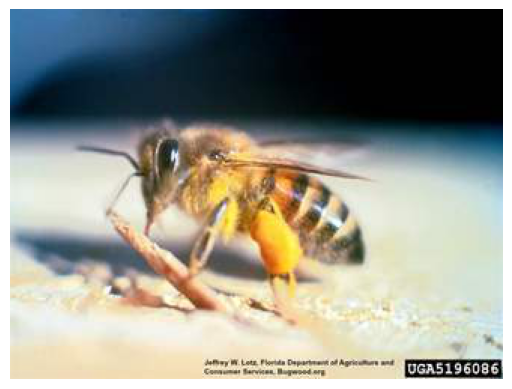

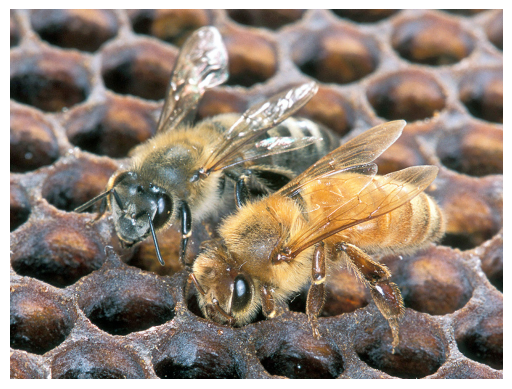

In [15]:
abelhas_files = os.listdir(abelha_dir)
pic_index = 3

abelhas = [os.path.join(abelha_dir, fname)
                for fname in abelhas_files[pic_index-2:pic_index]]

for i, img_path in enumerate(abelhas):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

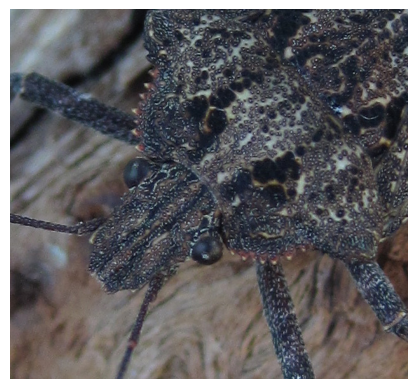

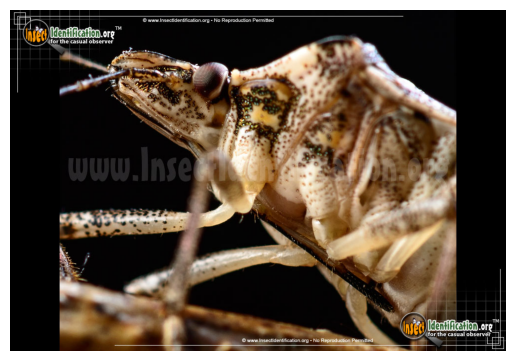

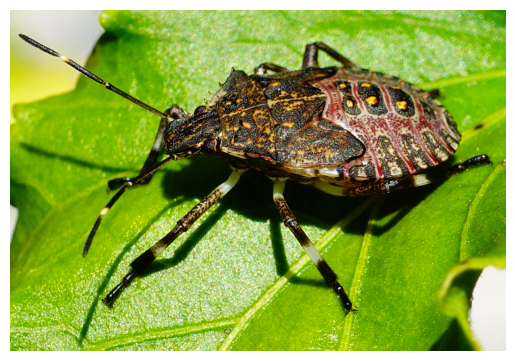

In [16]:
percevejo_files = os.listdir(percevejo_dir)
pic_index = 3

percevejo = [os.path.join(percevejo_dir, fname)
                for fname in percevejo_files[pic_index-3:pic_index]]

for i, img_path in enumerate(percevejo):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

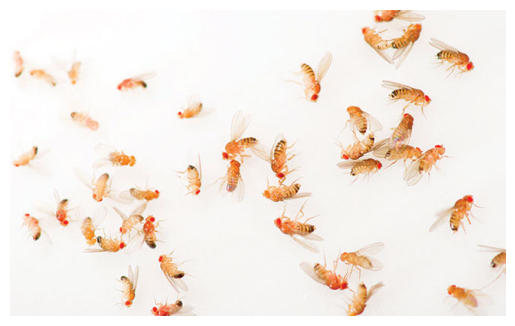

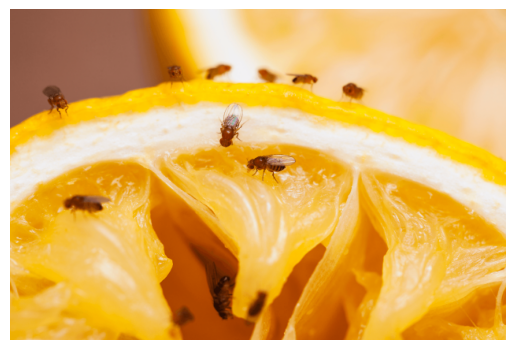

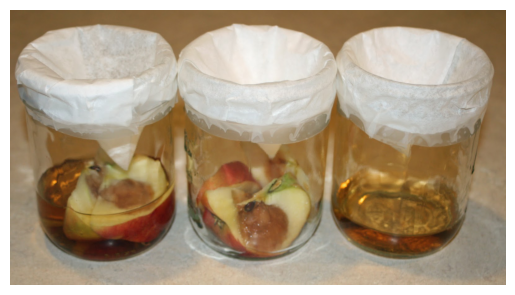

In [17]:
mosca_files = os.listdir(mosca_dir)
pic_index = 5

mosca = [os.path.join(mosca_dir, fname)
                for fname in mosca_files[pic_index-3:pic_index]]

for i, img_path in enumerate(mosca):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Pipe modelagem

In [18]:
num_classes = 3

In [19]:
TRAINING_DIR = path_train
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = path_test
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
 )


model = tf.keras.models.Sequential([
    # 1ª camada e config do tamanho das imagens + 3 bandas RGB
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2ª camada
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3ª camada
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4ª camada
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Fluxo de alimentação da DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neoroniso ocultos + 3 classes
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch=4, validation_data = validation_generator, verbose = 1, validation_steps=3)

Found 120 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                        

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - 23s 5s/step - loss: 1.4749 - accuracy: 0.2375 - val_loss: 1.3018 - val_accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 12s 3s/step - loss: 1.1288 - accuracy: 0.3375 - val_loss: 1.1064 - val_accuracy: 0.2167
Epoch 3/10
4/4 [==============================] - 12s 3s/step - loss: 1.0962 - accuracy: 0.3500 - val_loss: 1.1034 - val_accuracy: 0.3000
Epoch 4/10
4/4 [==============================] - 14s 4s/step - loss: 1.1223 - accuracy: 0.2875 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 5/10
4/4 [==============================] - 12s 3s/step - loss: 1.1011 - accuracy: 0.3625 - val_loss: 1.0943 - val_accuracy: 0.3000
Epoch 6/10
4/4 [==============================] - 13s 3s/step - loss: 1.0880 - accuracy: 0.3875 - val_loss: 1.1042 - val_accuracy: 0.2333
Epoch 7/10
4/4 [==============================] - 14s 4s/step - loss: 1.2550 - accuracy: 0.3500 - val_loss: 1.1057 - val_accuracy: 0.2667
Epoch 8/10
4/4 [=============================

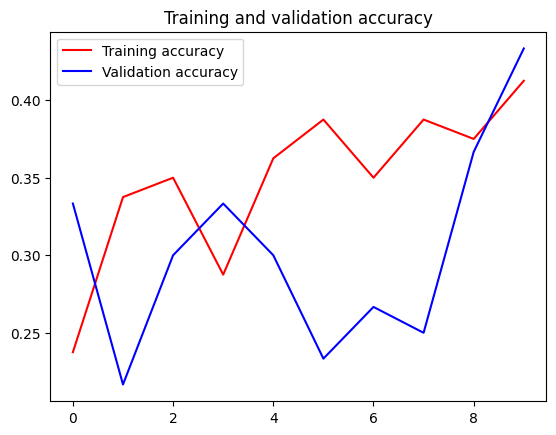

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [21]:
TRAINING_DIR = path_train
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = path_test
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

model = tf.keras.models.Sequential([
    # 1ª camada e config do tamanho das imagens + 3 bandas RGB
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2ª camada
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3ª camada
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4ª camada
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Fluxo de alimentação da DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neoroniso ocultos + 3 classes
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=3)

Found 120 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                      

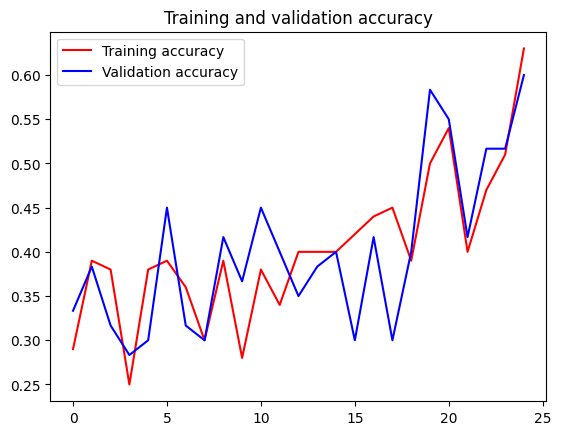

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [23]:
TRAINING_DIR = path_train
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = path_test
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=65, steps_per_epoch=6, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("classifocador_inset.h5")

Found 120 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                      

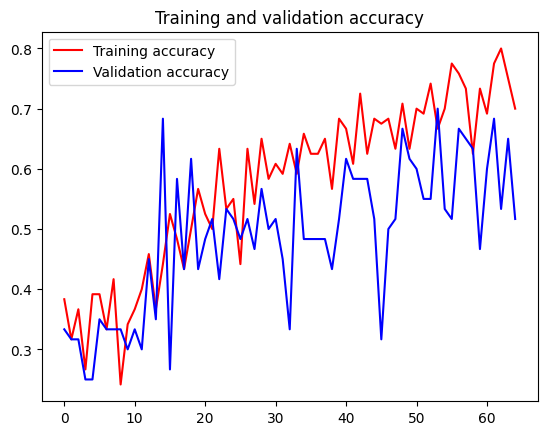

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

O Gráfico acima indica um possível limite para tempo de treinamento a aprtir de 60 épocas. Pois é possível notar que a validação de treino segue apresentando ganho de acurácia, equanto a

**Indices dos resultados esperados**

In [25]:
print(f'label das classes uitilizados pelo modelo: {validation_generator.class_indices}')

label das classes uitilizados pelo modelo: {'Abelhas': 0, 'Mosca': 1, 'Percevejo': 2}


**Execução de algumas predições**

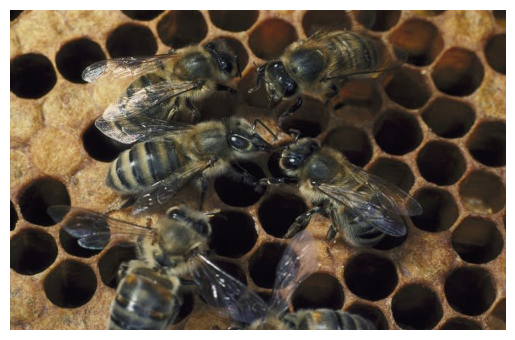

In [26]:
path_img_abelhas=dataset.dir_files + '/Test/Abelhas'
files_img_abelhas=os.listdir(path_img_abelhas)

imagem_sorteada_path=random.choice(files_img_abelhas)
imagem_sorteada_path=path_img_abelhas + '/'+ imagem_sorteada_path

img = mpimg.imread(imagem_sorteada_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

In [27]:
img = load_img(imagem_sorteada_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=20)

lista_resultados=classes[0].tolist()
classe_pred=lista_resultados.index(max(lista_resultados))


1/1 [==============================] - 0s 210ms/step


Predição do modelo para classe Abelha

In [28]:
if classe_pred == 0:
  print('Detectado: Abelha')
elif classe_pred == 1:
    print('Detectado: Mosca')
else :
    print('Detectado: Percevejo')

Detectado: Mosca


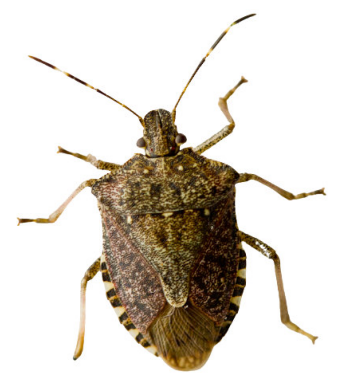

1/1 [==============================] - 0s 44ms/step


In [29]:
path_img_abelhas=dataset.dir_files + '/Test/Percevejo'
files_img_abelhas=os.listdir(path_img_abelhas)

imagem_sorteada_path=random.choice(files_img_abelhas)
imagem_sorteada_path=path_img_abelhas + '/'+ imagem_sorteada_path

img = mpimg.imread(imagem_sorteada_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

img = load_img(imagem_sorteada_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=20)

lista_resultados=classes[0].tolist()
classe_pred=lista_resultados.index(max(lista_resultados))

Predição do modelo para classe Percevejo

In [30]:
if classe_pred == 0:
  print('Detectado: Abelha')
elif classe_pred == 1:
    print('Detectado: Mosca')
else :
    print('Detectado: Percevejo')

Detectado: Mosca


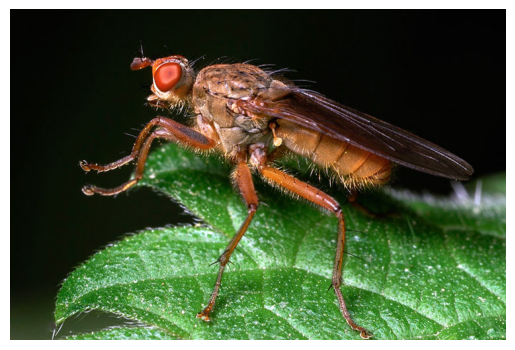

1/1 [==============================] - 0s 58ms/step


In [31]:
path_img_abelhas=dataset.dir_files + '/Test/Mosca'
files_img_abelhas=os.listdir(path_img_abelhas)

imagem_sorteada_path=random.choice(files_img_abelhas)
imagem_sorteada_path=path_img_abelhas + '/'+ imagem_sorteada_path

img = mpimg.imread(imagem_sorteada_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

img = load_img(imagem_sorteada_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=20)

lista_resultados=classes[0].tolist()
classe_pred=lista_resultados.index(max(lista_resultados))

Predição do modelo para classe Mosca

In [32]:
if classe_pred == 0:
  print('Detectado: Abelha')
elif classe_pred == 1:
    print('Detectado: Mosca')
else :
    print('Detectado: Percevejo')

Detectado: Mosca
